In [32]:
#import the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [33]:
#downloading the dataset 
!gdown 1Dv-HF10AUUA03AO_cQvar462eXawk0iQ

Downloading...
From: https://drive.google.com/uc?id=1Dv-HF10AUUA03AO_cQvar462eXawk0iQ
To: /content/train.csv
100% 748k/748k [00:00<00:00, 143MB/s]


In [34]:
#load the dataset as pandas dataframe
df=pd.read_csv("/content/train.csv")

In [35]:
#sample of dataset
df.head()

,vidid,adview,views,likes,dislikes,comment,published,duration,category
0,VID_18655,40,1031602,8523,363,1095,2016-09-14,PT7M37S,F
1,VID_14135,2,1707,56,2,6,2016-10-01,PT9M30S,D
2,VID_2187,1,2023,25,0,2,2016-07-02,PT2M16S,C
3,VID_23096,6,620860,777,161,153,2016-07-27,PT4M22S,H
4,VID_10175,1,666,1,0,0,2016-06-29,PT31S,D


In [36]:
#dataset shape
df.shape

(14999, 9)

In [37]:
#dataset overall information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   vidid      14999 non-null  object
 1   adview     14999 non-null  int64 
 2   views      14999 non-null  object
 3   likes      14999 non-null  object
 4   dislikes   14999 non-null  object
 5   comment    14999 non-null  object
 6   published  14999 non-null  object
 7   duration   14999 non-null  object
 8   category   14999 non-null  object
dtypes: int64(1), object(8)
memory usage: 1.0+ MB


**Observation**

1. no null values
2. adview is only integer column other column are all of type object
3. likes,dislikes,comments and views column must be  of type integer
4. published column must be tranformed 
5. category column is categorical features must be tranformed
6. duration column must be tranformed

In [38]:
df.describe()

,adview
count,1.499900e+04
mean,2.107791e+03
std,5.237711e+04
min,1.000000e+00
25%,1.000000e+00
50%,2.000000e+00
75%,6.000000e+00
max,5.429665e+06


In [39]:
df.isnull().sum()

vidid        0
adview       0
views        0
likes        0
dislikes     0
comment      0
published    0
duration     0
category     0
dtype: int64

In [40]:
df.isna().sum()

vidid        0
adview       0
views        0
likes        0
dislikes     0
comment      0
published    0
duration     0
category     0
dtype: int64

In [41]:
#taking a backup of original data before performing tranformation
df_backup=df

In [42]:
#converting categorical nominal column to numerical nominal column
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
print(df["category"].unique())
df["category"]=LE.fit_transform(df["category"])
print(df["category"].unique())

['F' 'D' 'C' 'H' 'E' 'B' 'G' 'A']
[5 3 2 7 4 1 6 0]


In [43]:
df.head()

,vidid,adview,views,likes,dislikes,comment,published,duration,category
0,VID_18655,40,1031602,8523,363,1095,2016-09-14,PT7M37S,5
1,VID_14135,2,1707,56,2,6,2016-10-01,PT9M30S,3
2,VID_2187,1,2023,25,0,2,2016-07-02,PT2M16S,2
3,VID_23096,6,620860,777,161,153,2016-07-27,PT4M22S,7
4,VID_10175,1,666,1,0,0,2016-06-29,PT31S,3


In [44]:
# Removing "F" present in data
df=df[df.views!="F"]

In [45]:
df=df[df.likes!="F"]

In [46]:
df=df[df.dislikes!="F"]

In [47]:
df=df[df.comment!="F"]

In [48]:
#converting likes , dislikes ,views and comments as integer type

In [49]:
df.views=df.views.astype("int64")

In [50]:
df.likes=df.likes.astype("int64")

In [51]:
df.dislikes=df.dislikes.astype("int64")

In [52]:
df.comment=df.comment.astype("int64")

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14637 entries, 0 to 14998
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   vidid      14637 non-null  object
 1   adview     14637 non-null  int64 
 2   views      14637 non-null  int64 
 3   likes      14637 non-null  int64 
 4   dislikes   14637 non-null  int64 
 5   comment    14637 non-null  int64 
 6   published  14637 non-null  object
 7   duration   14637 non-null  object
 8   category   14637 non-null  int64 
dtypes: int64(6), object(3)
memory usage: 1.1+ MB


**Converted to integers**

In [54]:
vivid_colm=df["vidid"]

In [55]:
#regex expression to match hours minutes and seconds pattern
import re
def funsec(string):

  pattern = r'PT(?:(?P<hours>\d+)H)?((?P<minutes>\d+)M)?((?P<seconds>\d+)S)?'
  hours=0
  minutes=0
  seconds=0
  match = re.search(pattern, string)
  if match:
      hours = match.group('hours') if match.group('hours') else 0
      minutes = match.group('minutes') if match.group('minutes') else 0
      seconds = match.group('seconds') if match.group('seconds') else 0
      return int(hours)*3600+int(minutes)*60+int(seconds)


In [56]:
# Converting hours minutes and seconds
df["duration"]=df["duration"].apply(funsec)

In [57]:
df.head()

,vidid,adview,views,likes,dislikes,comment,published,duration,category
0,VID_18655,40,1031602,8523,363,1095,2016-09-14,457,5
1,VID_14135,2,1707,56,2,6,2016-10-01,570,3
2,VID_2187,1,2023,25,0,2,2016-07-02,136,2
3,VID_23096,6,620860,777,161,153,2016-07-27,262,7
4,VID_10175,1,666,1,0,0,2016-06-29,31,3


In [58]:
#Encoding the duration vivid and published columns
df["vidid"]=LE.fit_transform(df["vidid"])
df["published"]=LE.fit_transform(df["published"])

In [59]:
df.head()

,vidid,adview,views,likes,dislikes,comment,published,duration,category
0,5912,40,1031602,8523,363,1095,2168,457,5
1,2741,2,1707,56,2,6,2185,570,3
2,8138,1,2023,25,0,2,2094,136,2
3,9005,6,620860,777,161,153,2119,262,7
4,122,1,666,1,0,0,2091,31,3


In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14637 entries, 0 to 14998
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   vidid      14637 non-null  int64
 1   adview     14637 non-null  int64
 2   views      14637 non-null  int64
 3   likes      14637 non-null  int64
 4   dislikes   14637 non-null  int64
 5   comment    14637 non-null  int64
 6   published  14637 non-null  int64
 7   duration   14637 non-null  int64
 8   category   14637 non-null  int64
dtypes: int64(9)
memory usage: 1.1 MB


**Observation**
1. the column adview doesn't correalte much other columns
2. likes,dislikes , views and comments are highly correlated which understandable for youtube video

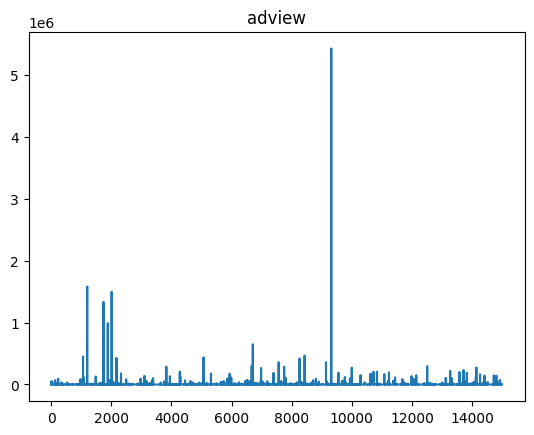

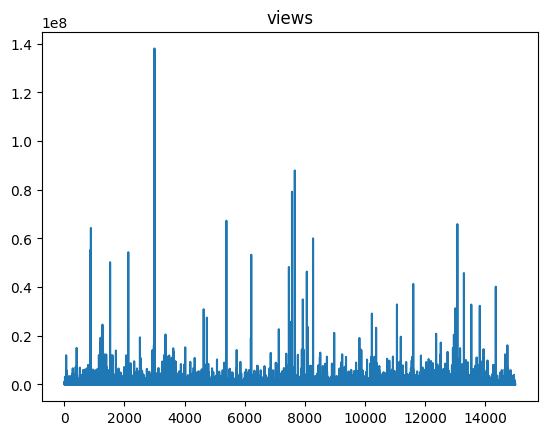

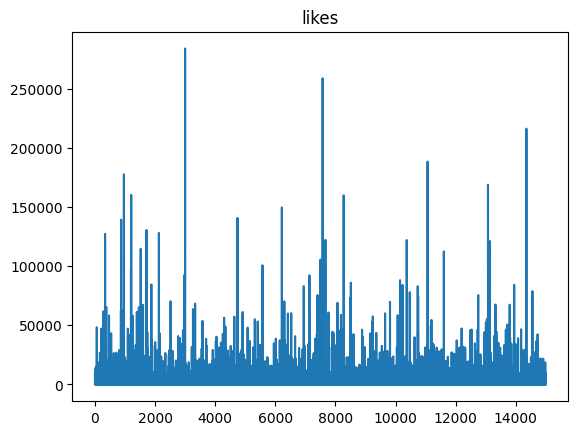

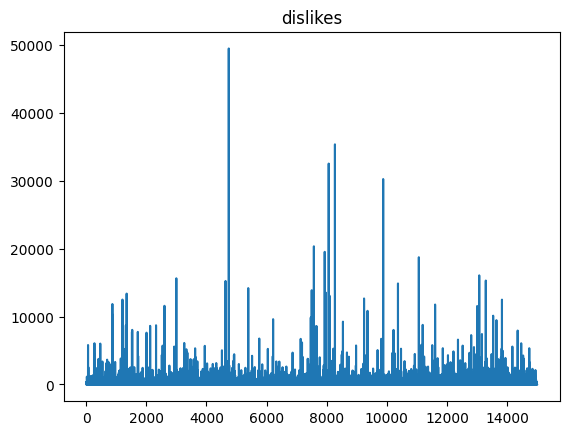

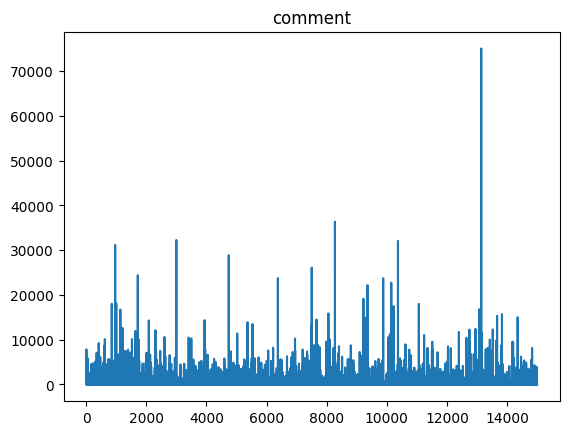

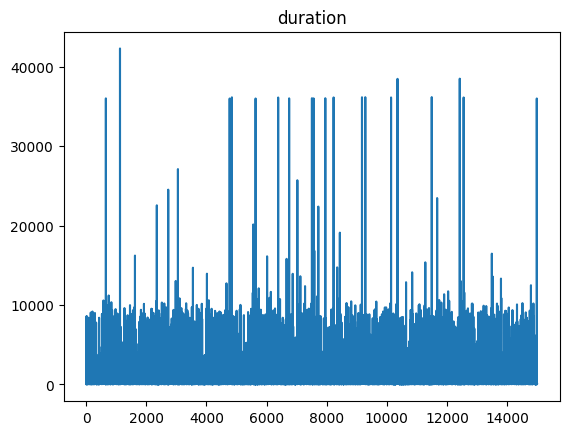

In [61]:
#Visulation
for i in df:
  if i !="category"and i !="published" and i !="vidid":
    plt.plot(df[i])
    plt.title(i)
    plt.show()
    print()

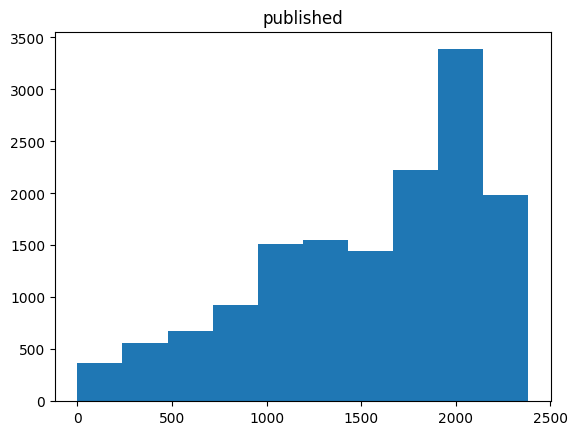

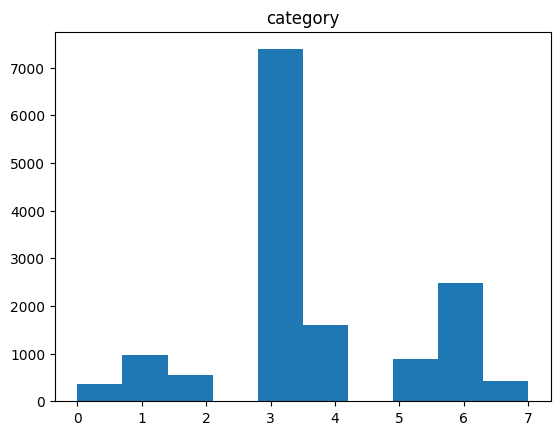

In [62]:
for i in df:
  if i =="category" or i =="published":
    plt.hist(df[i])
    plt.title(i)
    plt.show()

In [63]:
df=df[df.adview<2000000]

In [64]:
#checking the correlation among columns
df.corr()

,vidid,adview,views,likes,dislikes,comment,published,duration,category
vidid,1.000000,-0.031080,-0.047581,-0.128860,-0.076460,-0.081059,-0.144470,0.006910,-0.038917
adview,-0.031080,1.000000,0.031177,0.046541,0.016686,0.017631,0.055657,-0.019592,-0.004910
views,-0.047581,0.031177,1.000000,0.726599,0.730216,0.410597,0.020110,0.002563,0.032822
likes,-0.128860,0.046541,0.726599,1.000000,0.648631,0.651215,0.096941,-0.042518,-0.009175
dislikes,-0.076460,0.016686,0.730216,0.648631,1.000000,0.532588,0.043745,0.001587,0.011355
comment,-0.081059,0.017631,0.410597,0.651215,0.532588,1.000000,0.114253,-0.037478,-0.034107
published,-0.144470,0.055657,0.020110,0.096941,0.043745,0.114253,1.000000,0.011976,-0.056814
duration,0.006910,-0.019592,0.002563,-0.042518,0.001587,-0.037478,0.011976,1.000000,0.049235
category,-0.038917,-0.004910,0.032822,-0.009175,0.011355,-0.034107,-0.056814,0.049235,1.000000


<ipython-input-65-f58c6bfa6240>:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  sns.heatmap(correlation,mask=np.zeros_like(correlation,dtype=np.bool),cmap=sns.diverging_palette(220,10,as_cmap=True),square=True,ax=ax,annot=True)


<Axes: >

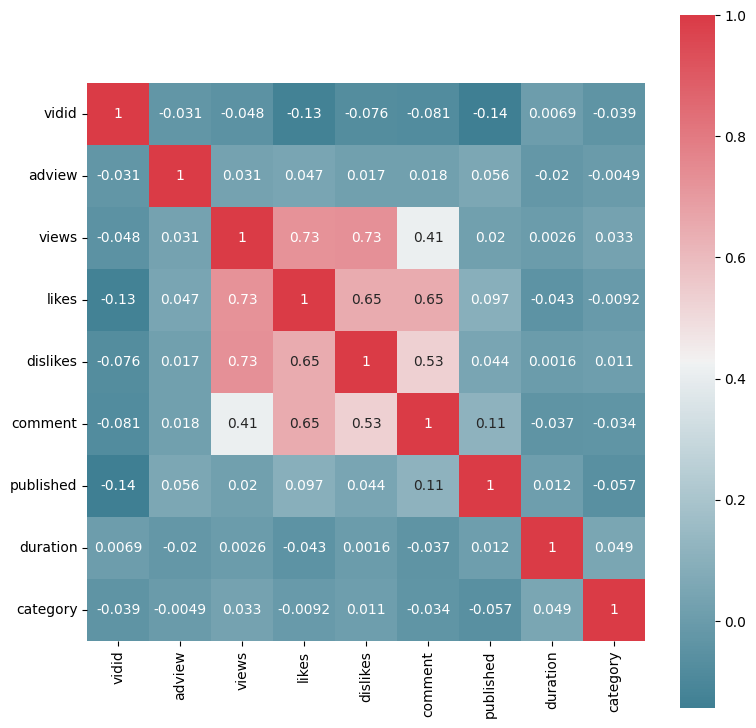

In [65]:
f,ax=plt.subplots(figsize=(9, 9))
correlation=df.corr()
sns.heatmap(correlation,mask=np.zeros_like(correlation,dtype=np.bool),cmap=sns.diverging_palette(220,10,as_cmap=True),square=True,ax=ax,annot=True)

In [105]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
X_train,X_test,y_train,y_test=train_test_split(df.drop(["adview"],axis=1),df["adview"],test_size=0.2,random_state=42)

In [106]:
Scaler=MinMaxScaler()
X_train=Scaler.fit_transform(X_train)
X_test=Scaler.transform(X_test)

In [68]:
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error
from catboost import CatBoostRegressor
import xgboost as xgb
from keras.models import Sequential
from keras.layers import Dense
import numpy as np


# Define the regression models and their corresponding hyperparameter grids
models = [
    (LinearRegression(), {}),
    (Ridge(), {'alpha': [0.1, 1, 10]}),
    (Lasso(), {'alpha': [0.1, 1, 10]}),
    (ElasticNet(), {'alpha': [0.1, 1, 10], 'l1_ratio': [0.2, 0.5, 0.8]}),
    (DecisionTreeRegressor(), {'max_depth': [None, 5, 10]}),
    (RandomForestRegressor(), {'n_estimators': [100, 200, 300], 'max_depth': [None, 5, 10]}),
    (GradientBoostingRegressor(), {'n_estimators': [100, 200, 300], 'learning_rate': [0.01, 0.1, 1.0]}),
    (AdaBoostRegressor(), {'n_estimators': [50, 100, 150], 'learning_rate': [0.01, 0.1, 1.0]}),
    (SVR(), {'kernel': ['linear', 'rbf'], 'C': [0.1, 1, 10]}),
    (CatBoostRegressor(silent=True), {'iterations': [100, 200, 300], 'learning_rate': [0.01, 0.1, 1.0]}),
    (xgb.XGBRegressor(), {'max_depth': [3, 5, 7], 'learning_rate': [0.01, 0.1, 1.0]}),
    (Sequential([Dense(64, activation='relu', input_shape=X_train.shape[1:]),Dense(64, activation='relu'),Dense(1)]), {})
]


# List to store the scoring results
Minmax_scoring_results = []

# Train and evaluate each model with hyperparameter tuning
for model, param_grid in models:
    if isinstance(model, Sequential):
        model.compile(loss='mean_squared_error', optimizer='adam')
        model.fit(X_train, y_train, epochs=100, verbose=0)
        y_pred = model.predict(X_test).flatten()
    else:
        grid_search = GridSearchCV(model, param_grid, scoring='neg_mean_absolute_error', cv=5,verbose=3)
        grid_search.fit(X_train, y_train)
        y_pred = grid_search.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    Minmax_scoring_results.append({'Model': type(model).__name__, 'Best Parameters': grid_search.best_params_, 'MAE': mae, 'MSE': mse, 'RMSE': rmse})

# Print the scoring results
for result in Minmax_scoring_results:
    print('Model:', result['Model'])
    print('Best Parameters:', result['Best Parameters'])
    print('MAE:', result['MAE'])
    print('MSE:', result['MSE'])
    print('RMSE:', result['RMSE'])
    print('-----------------------')


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV 1/5] END ..............................., score=-3830.455 total time=   0.0s
[CV 2/5] END ..............................., score=-3492.952 total time=   0.0s
[CV 3/5] END ..............................., score=-3596.922 total time=   0.0s
[CV 4/5] END ..............................., score=-4149.382 total time=   0.0s
[CV 5/5] END ..............................., score=-2897.613 total time=   0.0s
Fitting 5 folds for each of 3 candidates, totalling 15 fits
[CV 1/5] END .....................alpha=0.1;, score=-3824.687 total time=   0.0s
[CV 2/5] END .....................alpha=0.1;, score=-3489.870 total time=   0.0s
[CV 3/5] END .....................alpha=0.1;, score=-3583.035 total time=   0.0s
[CV 4/5] END .....................alpha=0.1;, score=-4142.967 total time=   0.0s
[CV 5/5] END .....................alpha=0.1;, score=-2892.570 total time=   0.0s
[CV 1/5] END .......................alpha=1;, score=-3799.641 total tim

In [84]:
Result_df=pd.DataFrame.from_dict(Minmax_scoring_results)

In [115]:
Result_df

,Model,Best Parameters,MAE,MSE,RMSE
0,LinearRegression,{},3573.904714,8.310095e+08,28827.235464
1,Ridge,{'alpha': 10},3501.157105,8.284939e+08,28783.569330
2,Lasso,{'alpha': 10},3490.777214,8.295889e+08,28802.585150
3,ElasticNet,"{'alpha': 0.1, 'l1_ratio': 0.2}",3170.033665,8.283417e+08,28780.925975
4,DecisionTreeRegressor,{'max_depth': 5},3571.910013,1.946512e+09,44119.290696
5,RandomForestRegressor,"{'max_depth': 10, 'n_estimators': 300}",2725.713958,5.593129e+08,23649.797073
6,GradientBoostingRegressor,"{'learning_rate': 0.1, 'n_estimators': 100}",3435.953126,1.203068e+09,34685.273122
7,AdaBoostRegressor,"{'learning_rate': 0.01, 'n_estimators': 50}",2917.888813,8.227691e+08,28683.951552
8,SVR,"{'C': 10, 'kernel': 'rbf'}",1696.806042,8.336853e+08,28873.609681
9,CatBoostRegressor,"{'iterations': 300, 'learning_rate': 0.01}",3018.869101,7.228945e+08,26886.697561


In [114]:
n_estimators = 300
max_depth = 10

# Train and evaluate the RandomForestRegressor
model = RandomForestRegressor(n_estimators=n_estimators, max_depth=max_depth)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

# Print the evaluation metrics
print('MAE:', mae)
print('MSE:', mse)
print('RMSE:', rmse)




MAE: 2703.490320565951
MSE: 528546201.7995799
RMSE: 22990.132705131997


In [118]:
import joblib
joblib.dump(model,"RFR.pkl")

['RFR.pkl']

In [123]:
#load the dataset as pandas dataframe
df_test=pd.read_csv("/content/test.csv")
df_test.head()

,vidid,views,likes,dislikes,comment,published,duration,category
0,VID_1054,440238,6153,218,1377,2017-02-18,PT7M29S,B
1,VID_18629,1040132,8171,340,1047,2016-06-28,PT6M29S,F
2,VID_13967,28534,31,11,1,2014-03-10,PT37M54S,D
3,VID_19442,1316715,2284,250,274,2010-06-05,PT9M55S,G
4,VID_770,1893173,2519,225,116,2016-09-03,PT3M8S,B


In [129]:
df_test.shape

(8764, 8)

In [124]:
def PreProcess(df):
  """
  PreProcess the test data as in train data
  Args:
      df : pandas DataFrame
  returns preprocessed numpy array for prediction
  """

  df["category"]=LE.fit_transform(df["category"])
  df["vidid"]=LE.fit_transform(df["vidid"])
  df["published"]=LE.fit_transform(df["published"])
  df.comment=df.comment.apply(lambda x: 0 if x=="F" else x)
  df.views=df.views.apply(lambda x: 0 if x=="F" else x)
  df.likes=df.likes.apply(lambda x: 0 if x=="F" else x)
  df.dislikes=df.dislikes.apply(lambda x: 0 if x=="F" else x)
  df.comment=df.comment.astype("int64")
  df.dislikes=df.dislikes.astype("int64")
  df.likes=df.likes.astype("int64")
  df.views=df.views.astype("int64")

  def funsec(string):

    pattern = r'PT(?:(?P<hours>\d+)H)?((?P<minutes>\d+)M)?((?P<seconds>\d+)S)?'
    hours=0
    minutes=0
    seconds=0
    match = re.search(pattern, string)
    if match:
        hours = match.group('hours') if match.group('hours') else 0
        minutes = match.group('minutes') if match.group('minutes') else 0
        seconds = match.group('seconds') if match.group('seconds') else 0
        return int(hours)*3600+int(minutes)*60+int(seconds)
  df["duration"]=df["duration"].apply(funsec)
  Scaler=MinMaxScaler()
  df=Scaler.fit_transform(df)
  return df


In [125]:
df_test=PreProcess(df_test)

In [126]:
df_test,type(df_test)

(array([[2.64749515e-02, 1.95532926e-03, 1.92237996e-02, ...,
         9.74857685e-01, 1.07451417e-02, 1.42857143e-01],
        [4.02715965e-01, 4.61977507e-03, 2.55286311e-02, ...,
         8.66698292e-01, 9.29309552e-03, 7.14285714e-01],
        [1.88634029e-01, 1.26734551e-04, 9.68532080e-05, ...,
         4.79127135e-01, 5.49115462e-02, 4.28571429e-01],
        ...,
        [4.18920461e-01, 8.40200239e-03, 1.43905121e-02, ...,
         8.65749526e-01, 1.03821302e-02, 7.14285714e-01],
        [8.07828369e-01, 3.17506604e-03, 5.12072284e-03, ...,
         8.20683112e-01, 4.59814622e-03, 4.28571429e-01],
        [9.34953783e-01, 2.35267721e-05, 3.74915644e-05, ...,
         9.47817837e-01, 1.47382687e-02, 4.28571429e-01]]),
 numpy.ndarray)

In [127]:
model_file = joblib.load('RFR.pkl')
y_pred=model_file.predict(df_test)

In [130]:
result=pd.DataFrame(y_pred,columns=["adviews"])

In [132]:
result.to_csv("Prediction.csv")